# **Online Payments Fraud Detection with Machine Learning**

A introdução de sistemas de pagamento online ajudou muito na facilidade de pagamentos. Mas, ao mesmo tempo, aumentou nas fraudes de pagamento. Fraudes de pagamento online podem acontecer com qualquer pessoa que use qualquer sistema de pagamento, especialmente ao fazer pagamentos com cartão de crédito. É por isso que a detecção de fraudes de pagamento online é muito importante para as empresas de cartão de crédito, para garantir que os clientes não sejam cobrados pelos produtos e serviços que nunca pagaram. Neste artigo, iremos aprender como detectar fraudes em pagamentos online com aprendizado de máquina usando **Python**.# **Online Payments Fraud Detection with Machine Learning**

A introdução de sistemas de pagamento online ajudou muito na facilidade de pagamentos. Mas, ao mesmo tempo, aumentou nas fraudes de pagamento. Fraudes de pagamento online podem acontecer com qualquer pessoa que use qualquer sistema de pagamento, especialmente ao fazer pagamentos com cartão de crédito. É por isso que a detecção de fraudes de pagamento online é muito importante para as empresas de cartão de crédito, para garantir que os clientes não sejam cobrados pelos produtos e serviços que nunca pagaram. Neste artigo, iremos aprender como detectar fraudes em pagamentos online com aprendizado de máquina usando **Python**.

# **Detecção de fraude em pagamentos online com aprendizado de máquina**

Para identificar fraudes de pagamento online com aprendizado de máquina, precisamos treinar um modelo de aprendizado de máquina para classificar pagamentos fraudulentos e não fraudulentos. Para isso, precisamos de um conjunto de dados contendo informações sobre fraudes de pagamento online, para que possamos entender que tipo de transação leva à fraude. Para esta tarefa, coletei um conjunto de dados do Kaggle, que contém informações históricas sobre transações fraudulentas que podem ser usadas para detectar fraudes em pagamentos online. Abaixo estão todas as colunas do conjunto de dados que usaremos:

**step**: representa uma unidade de tempo onde 1 passo equivale a 1 hora.

**type**: tipo de transação online.

**amount**: o valor da transação.

**nameOrig**: cliente iniciando a transação.

**oldbalanceOrg**: saldo antes da transação.

**newbalanceOrig**: saldo após a transação.

**nameDest**: destinatário da transação.

**oldbalanceDest**: saldo inicial do destinatário antes da transação.

**newbalanceDest**: o novo saldo do destinatário após a transação.

**isFraud**: transação fraudulenta.

In [19]:
import pandas as pd
import numpy as np

url = 'Payments.csv'

In [20]:
dados = pd.read_csv( url )
dados.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [44]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         object 
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [22]:
dados.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<AxesSubplot:>

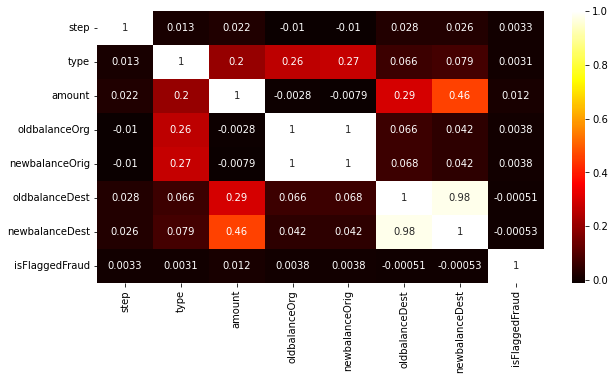

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure( figsize=(10,5) )
sns.heatmap( dados.corr(), annot=True, cmap='hot')

Portanto, este conjunto de dados não possui nenhum valor nulo. Antes de prosseguir, vamos dar uma olhada no tipo de transação mencionado no conjunto de dados:

In [23]:
# Explorando Tipo de Transação
tipos =  dados['type'].value_counts()
tipos

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [24]:
transacoes = tipos.index
quantidades = tipos.values

print( 'Transações: {0}'.format( transacoes ) )
print( 'Quantidades: {0}'.format( quantidades ) )

Transações: Index(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'], dtype='object')
Quantidades: [2237500 2151495 1399284  532909   41432]


In [25]:
import plotly.express as px

figure = px.pie( dados, 
                 values = quantidades,
                 names = transacoes,
                 hole = 0.5,
                 title = 'Distribuição dos Tipos de Transação')
figure.show()

Agora vamos dar uma olhada na correlação entre as características dos dados com a coluna **isFraud**:

In [26]:
# Verificando a Correlação
correlacao = dados.corr()

print( correlacao['isFraud'].sort_values( ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


Agora vamos transformar os recursos categóricos em numéricos. Aqui também vamos transformar os valores da coluna **isFraud** em **No Fraud** e **Fraud** para entender melhor a saída:

In [27]:
dados['type'] = dados['type'].map( {'CASH_OUT':1, 'PAYMENT':2, 'CASH_IN':3, 'TRANSFER':4, 'DEBIT':5} )

dados['isFraud'] = dados['isFraud'].map( {0:'No Fraud', 1:'Fraud'} )

display(dados.head())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


#### Modelo de Detecção de Fraudes em Pagamentos Online

Agora vamos treinar um modelo de classificação para classificar transações fraudulentas e não fraudulentas. Antes de treinar o modelo, vamos dividir os dados em conjuntos de treinamento e teste:

In [39]:
from sklearn.model_selection import train_test_split

X_features = [ 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest' ]
X = dados[ X_features ]
y = dados['isFraud']

Agora vamos treinar o modelo de detecção de fraude em pagamentos online:

In [40]:
from sklearn.tree import DecisionTreeClassifier

Xtrain, Xteste, ytrain, yteste = train_test_split( X, y, test_size=0.10, random_state=42)
modelo = DecisionTreeClassifier()

modelo.fit( Xtrain, ytrain )
print( modelo.score( Xteste, yteste ))

0.999775249818471


In [41]:
from sklearn.metrics import accuracy_score, classification_report

predicoes = modelo.predict( Xteste )
print( 'Acurácia da Predição: {0}'.format( accuracy_score( yteste, predicoes )))

print( classification_report( yteste, predicoes ))

Acurácia da Predição: 0.999775249818471
              precision    recall  f1-score   support

       Fraud       0.92      0.91      0.91       817
    No Fraud       1.00      1.00      1.00    635445

    accuracy                           1.00    636262
   macro avg       0.96      0.95      0.96    636262
weighted avg       1.00      1.00      1.00    636262



In [45]:
# Teste de Predição
#                     [ 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest' ]
X_features = np.array( [[ 4,     9000.60,  9000.60,         0.0,              0.0 ]])

print( modelo.predict( X_features ) )

['Fraud']


c:\Users\Max\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

